In [67]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [16]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [75]:
digits_data_DF = pd.DataFrame(digits.data, columns=['Feature '+str(i) for i in np.arange(1,65)])
digits_target_DF = pd.DataFrame({'target':digits.target})
digits_DF = pd.concat([digits_data_DF,digits_target_DF], axis=1)
digits_DF.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60,Feature 61,Feature 62,Feature 63,Feature 64,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
digits.data.shape

# prints 1797, 64 -- we have 1797 samples and 64 features

(1797, 64)

In [12]:
len(digits.target)

# prints 1797 -- we have 1797 targets (one for each sample)

1797

In [21]:
digits.images.shape

(1797, 8, 8)

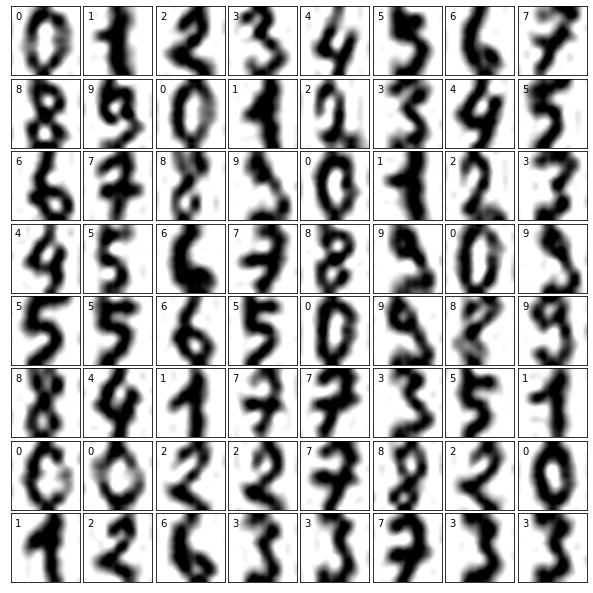

<Figure size 432x288 with 0 Axes>

In [106]:
fig = plt.figure(figsize=(8,8))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    axis = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    axis.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='sinc')
    axis.text(0,1,str(digits.target[i]))
    
plt.show()
plt.savefig('digits_images.png')

# Using Principal Component Analysis (PCA) to reduce dimensions

In [100]:
# creates a PCA model with 2-dimensional data
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)
digits_pca.shape
# we reduced the number of features from 64 to 2!!!
# this will be MUCH easier to process for ML

(1797, 2)

In [78]:
digits_pca_DF = pd.DataFrame({'Principal component 1':digits_pca[:,0],'Principal component 2':digits_pca[:,1]})
pca_DF = pd.concat([digits_pca_DF,digits_target_DF], axis=1)
pca_DF.head()

,Principal component 1,Principal component 2,target
0,-1.259468,21.274887,0
1,7.957609,-20.768698,1
2,6.991926,-9.955991,2
3,-15.906108,3.332469,3
4,23.306870,4.269056,4


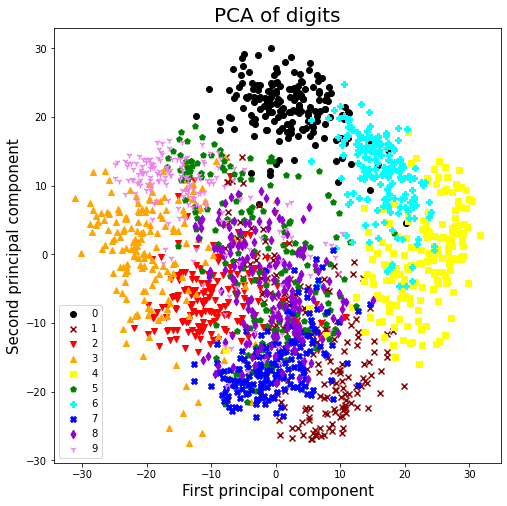

In [90]:
fig = plt.figure(figsize=(8,8))

colors = ['black','darkred','red','orange','yellow','green','cyan','blue','darkviolet','violet']
markers = ['o','x','v','^','s','p','P','X','d','1']

for i in range(10):
    x = digits_pca[:,0][digits.target == i]
    y = digits_pca[:,1][digits.target == i]
    plt.scatter(x, y, c=colors[i], marker=markers[i])
    
plt.legend(digits.target_names)
plt.xlabel('First principal component', fontsize=15)
plt.ylabel('Second principal component', fontsize=15)
plt.title('PCA of digits', fontsize=20)
plt.show()

# Showing the importance of applying StandardScaler before using PCA
Mean = 0, variance = 1

In [57]:
scaled_digits = StandardScaler().fit_transform(digits.data)
scaled_digits.shape

(1797, 64)

In [81]:
scaled_digits_pca = pca.fit_transform(scaled_digits)
scaled_digits_pca_DF = pd.DataFrame({'Principal component 1':scaled_digits_pca[:,0],'Principal component 2':scaled_digits_pca[:,1]})
scaled_pca_DF = pd.concat([scaled_digits_pca_DF,digits_target_DF], axis=1)
scaled_pca_DF.head()

,Principal component 1,Principal component 2,target
0,1.914216,-0.954513,0
1,0.588983,0.924647,1
2,1.302050,-0.317101,2
3,-3.020778,-0.868791,3
4,4.528942,-1.093518,4


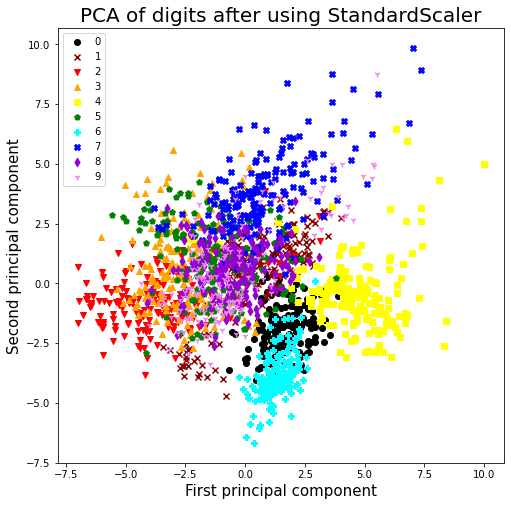

In [95]:
fig = plt.figure(figsize=(8,8))

for i in range(10):
    x = scaled_digits_pca[:,0][digits.target == i]
    y = scaled_digits_pca[:,1][digits.target == i]
    plt.scatter(x, y, c=colors[i], marker=markers[i])
    
plt.legend(digits.target_names)
plt.xlabel('First principal component', fontsize=15)
plt.ylabel('Second principal component', fontsize=15)
plt.title('PCA of digits after using StandardScaler', fontsize=20)
plt.show()

### As we can see from the two PCA graphs, these plots have drastically different PC values and behaviours. 
This method is clearly affected by the scale and variance of the data, and we MUST perform the StandardScaler step if we want to perform PCA on the data.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

## Checking how well PCA describes the dataset

In [102]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [105]:
print('The PCA data contains %0.2f percent of the information contained in the original set.' %(pca.explained_variance_ratio_.sum()*100))

The PCA data contains 28.51 percent of the information contained in the original set.


### This value is far from 85%, so reducing down to 2 dimensions does not really work here.